Multilayer neural networks are the foundation of deep learning. The multilayer perceptron was the first standardized architecture. In this assignment, you will learn to tune a multilayer perceptron model.

In [49]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [50]:
'''
Code implements multi-perceptron neural network to classify MNIST images of
handwritten digits using Keras and Tensorflow.  Based on code from
https://www.packtpub.com/books/content/training-neural-networks-efficiently-using-keras
'''

def load_and_condition_MNIST_data():
    ''' loads and shapes MNIST image data '''
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    print("\nLoaded MNIST images")
    X_train = X_train.astype(np.float32) #before conversion were uint8
    X_test = X_test.astype(np.float32)
    X_train.resize(len(y_train), 784) # 28 pix x 28 pix = 784 pixels
    X_test.resize(len(y_test), 784)
    print('\nFirst 3 labels of MNIST y_train: {}'.format(y_train[:5]))
    y_train_ohe = to_categorical(y_train) # one hot encode the target
    print('\nFirst 3 labels of MNIST y_train (one-hot):\n{}'.format(y_train_ohe[:3]))
    return X_train, y_train, X_test, y_test, y_train_ohe

In [51]:
X_train, y_train, X_test, y_test, y_train_onehot = load_and_condition_MNIST_data()  


Loaded MNIST images

First 3 labels of MNIST y_train: [5 0 4 1 9]

First 3 labels of MNIST y_train (one-hot):
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [52]:
#n_samples x n_features
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

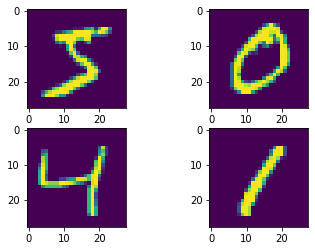

In [53]:

import matplotlib.pyplot as plt

f, ax = plt.subplots(2,2)

for i in range(4):
  binax = bin(i)[2:].zfill(2)
  ax[int(binax[0]), int(binax[1])].imshow(X_train[i].reshape(28,28))

In [54]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier().fit(X_train, y_train)
yhat1 = clf.predict(X_test)
print(accuracy_score(y_test, yhat1))

0.8756


In [55]:
#One-vs-all logistic classifier
#It's slow to train ten models but does a little better than the tree!
from sklearn.multiclass import OneVsRestClassifier
#the estimator is stochastic gradient descent
from sklearn.linear_model import SGDClassifier

lr = OneVsRestClassifier(SGDClassifier()).fit(X_train, y_train)
yhat2 = lr.predict(X_test)
print(accuracy_score(y_test, yhat2))

0.881


### Logistic Regression in Keras

The simplest neural network in Keras is a single node with no hidden layer. A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. Features becomes nodes in the input layer. Here we have 784, one for each pixel in each image.

In [ ]:
n_samples, n_features = X_train.shape
n_samples, n_features

(60000, 784)

In [165]:
#The input layer can also be defined explicitly in a separate layer.
model = Sequential( [Dense (1, input_dim=n_features, activation='sigmoid', )] )

In [166]:
#Why does this run without training? Because weights are randomly initialized
#Optimization will dial in the weight vector
#This initial accuracy fluctuates widely with each new model
yhat3 = model.predict(X_test)
yhat3 = np.array(yhat3, dtype=int)
print(accuracy_score(y_test, yhat3))
print(yhat3[:7].T)

0.1666
[[1 1 1 1 0 1 0]]


In [ ]:
#Draws samples from a uniform distribution within [-limit, limit], where limit = sqrt(6 / (fan_in + fan_out)) (fan_in is the number of input units in the weight tensor and fan_out is the number of output units).